## NN regression

Simple NN example doing linear regression for the sake of intuition

In [1]:
# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from keras_visualizer import visualizer 

In [2]:
# generate regression dataset
n_train=5000
n_test=5000

In [6]:
def f(x):
    """ Function we want our neural network to learn"""
    return np.sin(2*x[:,0])+3

In [7]:
x_train=np.random.uniform(size=(n_train,1))
x_test=np.random.uniform(size=(n_test,1))

In [9]:
y_train=f(x_train)
y_test=f(x_test)

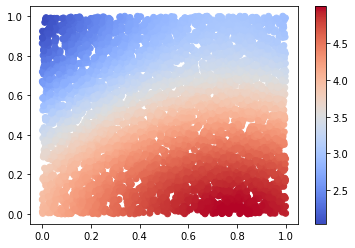

In [6]:
sc=plt.scatter(x_train[:,0],x_train[:,1],c=y_train, cmap=plt.cm.coolwarm)
plt.colorbar(sc)

In [10]:
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=1, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=1000, verbose=0)

In [11]:
y_predict=model.predict(x_test)

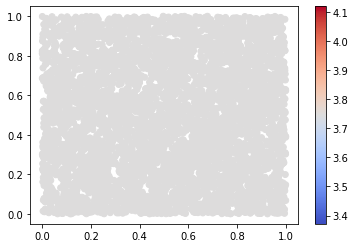

In [9]:
sc=plt.scatter(x_test[:,0],x_test[:,1],c=y_predict, cmap=plt.cm.coolwarm)
plt.colorbar(sc)

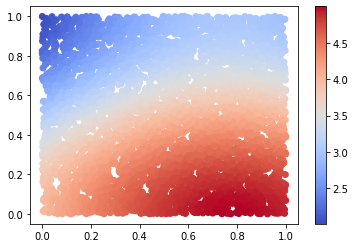

In [10]:
sc=plt.scatter(x_test[:,0],x_test[:,1],c=y_test, cmap=plt.cm.coolwarm)
plt.colorbar(sc)

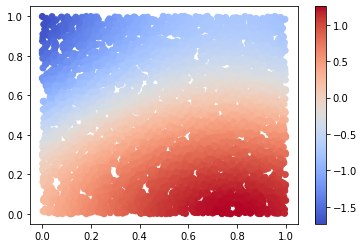

In [11]:
sc=plt.scatter(x_test[:,0],x_test[:,1],c=y_test-y_predict.squeeze(), cmap=plt.cm.coolwarm)
plt.colorbar(sc)

In [12]:
model.layers

In [13]:
model.layers[0].weights

[<tf.Variable 'dense_3/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[ 1.064655  , -0.08287995,  0.1925733 , -0.28982192]],
       dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(4,) dtype=float32, numpy=array([0.4073941 , 0.50497204, 0.8081053 , 0.        ], dtype=float32)>]

In [14]:
model.layers[1].weights

[<tf.Variable 'dense_4/kernel:0' shape=(4, 6) dtype=float32, numpy=
 array([[ 0.5691943 ,  0.66571957, -0.5952136 , -0.7474983 ,  0.4268575 ,
          0.64812136],
        [-0.848842  , -0.7831828 ,  0.732579  ,  0.34641448, -0.7270033 ,
          0.38555402],
        [-0.16154699,  0.18465404,  0.24419197, -0.0823892 ,  0.35312033,
          1.1962997 ],
        [ 0.1932314 ,  0.7729752 , -0.14144301, -0.16239572, -0.6717211 ,
         -0.6626383 ]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(6,) dtype=float32, numpy=
 array([-0.20169307, -0.25131103,  0.10161254, -0.02392995, -0.3703777 ,
         0.6443627 ], dtype=float32)>]

In [15]:
model.layers[-1].weights

[<tf.Variable 'dense_5/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[-1.0407681 ],
        [-0.57255965],
        [-1.0186248 ],
        [-0.7968288 ],
        [-1.0597305 ],
        [ 1.4048734 ]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.53342974], dtype=float32)>]